In [2]:
from ShapeVVE.DataLoader.fetcher import DataFetcher
import torch
from ShapeVVE.DataLoader.loadDataFromAfrr import get_UEA_dataset

# 1.加载数据集
DATASET_PATH = "../../../data_files/Multivariate2018_arff/Multivariate_arff"
x_train, y_train, x_val, y_val, x_test, y_test=get_UEA_dataset(DATASET_PATH,"BasicMotions")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_val: {x_val.shape}, y_val: {y_val.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x_train = torch.from_numpy(x_train).to(device)
x_val = torch.from_numpy(x_val).to(device)
x_test = torch.from_numpy(x_test).to(device)
y_train = torch.from_numpy(y_train).to(device)
y_val = torch.from_numpy(y_val).to(device)
y_test = torch.from_numpy(y_test).to(device)

n_classes = len(torch.unique(y_train))
in_channels=len(x_train[0])

datafetcher=DataFetcher.from_data_splits(
        x_train=x_train,
        y_train=y_train,
        x_valid=x_val,
        y_valid=y_val,
        x_test=x_test,
        y_test=y_test,
        one_hot=False,
    )

print(f'n_classes: {n_classes}')

Shapes - Train: (40, 6, 100), Val: (8, 6, 100), Test: (32, 6, 100)
x_train: (40, 6, 100), y_train: (40,), x_val: (8, 6, 100), y_val: (8,), x_test: (32, 6, 100), y_test: (32,)
n_classes: 4


metric_name is Metrics(metric_name)
DVRLChannel(rl_epochs=20, rl_batch_size=10000, device=cpu)
Elapsed time DVRLChannel(rl_epochs=20, rl_batch_size=10000, device=cpu): 0:01:39.762769
['data_evaluators', 'fetcher', 'num_data_eval', 'raise_error', 'timings', 'train_kwargs']
[{'accuracy': 1.0, 'sum_dimension': 0.5274999737739563}]
execute end


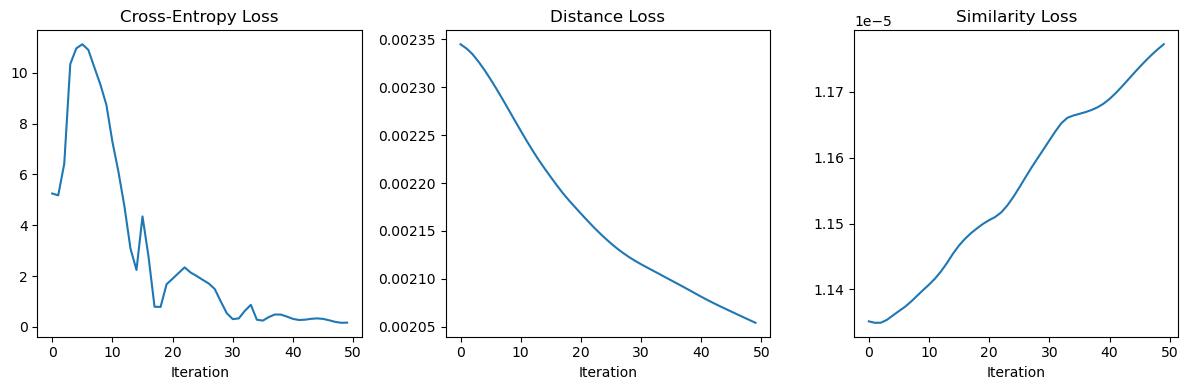

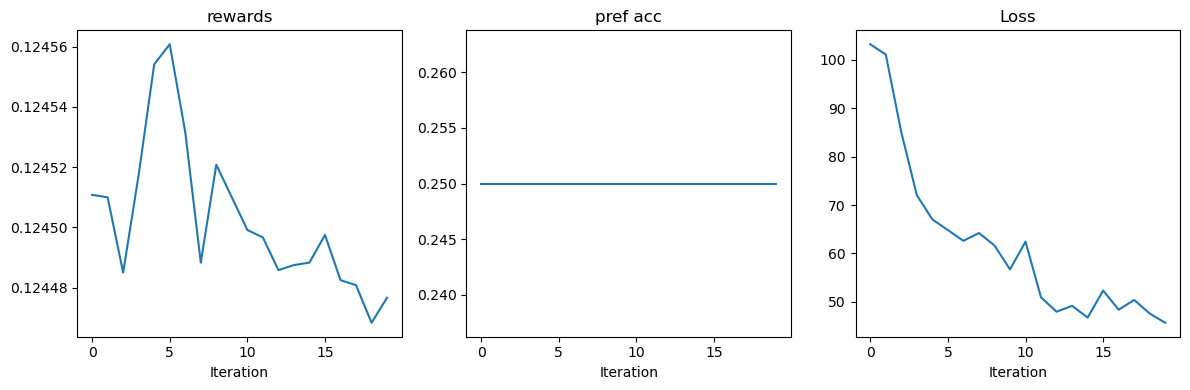

In [14]:
from torch import nn
import torch
from ShapeVVE.ShapeletsVE.shapeletsVE import DVRLChannel
from ShapeVVE.Evaluate.api import ExperimentMediatorChannel
from ShapeVVE.PredictorModel.LearningShapeletsDimension import LearningShapeletsDimensionSelection

metric_name="accuracy"
shapelets_size_and_len = {15: 100,  30: 100}

train_kwargs = {"epochs": 50, "batch_size": 100, "lr": 0.01}
device = 'cpu'

model = LearningShapeletsDimensionSelection(
    shapelets_size_and_len=shapelets_size_and_len,  # 增加shapelet数量
    loss_func=nn.CrossEntropyLoss(),
    in_channels=in_channels,  # 确保与数据实际通道数一致
    num_classes=n_classes,
    dist_measure='euclidean',
    verbose=1,
    device=device,
    to_cuda=torch.cuda.is_available(),
    k=4,           # 增大最近邻数量
    l1=0.001,        # 降低距离损失权重
    l2=0.001,        # 降低相似性损失权重
    lr=0.01,
    weight_decay=1e-4
)

exper_med = ExperimentMediatorChannel(
    fetcher=datafetcher,
    pred_model=model,
    train_kwargs=train_kwargs,
    metric_name=metric_name,
)

data_evaluators = [DVRLChannel(rl_epochs=20,rl_batch_size=10000,device=device)]

# compute data values.
exper_med = exper_med.compute_data_values(shapelets_num_sum=200,data_evaluators=data_evaluators)
print([attr for attr in dir(exper_med) if not callable(getattr(exper_med, attr)) and not attr.startswith('__')])

result=exper_med.evaluate_shapeletVE_model(data_evaluators=data_evaluators)
print(result)
# 根据传入的函数，存储精度等评估结果,评估精度

print(f'execute end')